In [1]:
import pandas as pd
import numpy as np

#Set seed for reproducibility
np.random.seed(42)

#Simulate conversions
#Group A (Control): 10% conversion rate
#Group B (Variant): 13% conversion rate
group_A = np.random.binomial(n=1, p=0.10, size=1000)
group_B = np.random.binomial(n=1, p=0.13, size=1000)

#Created a DataFrame
df = pd.DataFrame({
    'group': ['A'] * 1000 + ['B'] * 1000,
    'converted': np.concatenate([group_A, group_B])
})

#first few rows
df.head()


,group,converted
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


In [2]:
conversion_rates = df.groupby('group')['converted'].mean()
print(conversion_rates)


group
A    0.100
B    0.131
Name: converted, dtype: float64


In [3]:
from statsmodels.stats.proportion import proportions_ztest

# Successes and observations
successes = [df[df.group == 'A'].converted.sum(), df[df.group == 'B'].converted.sum()]
nobs = [df[df.group == 'A'].shape[0], df[df.group == 'B'].shape[0]]

# Perform z-test
z_stat, p_val = proportions_ztest(successes, nobs)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")


Z-statistic: -2.1687
P-value: 0.0301


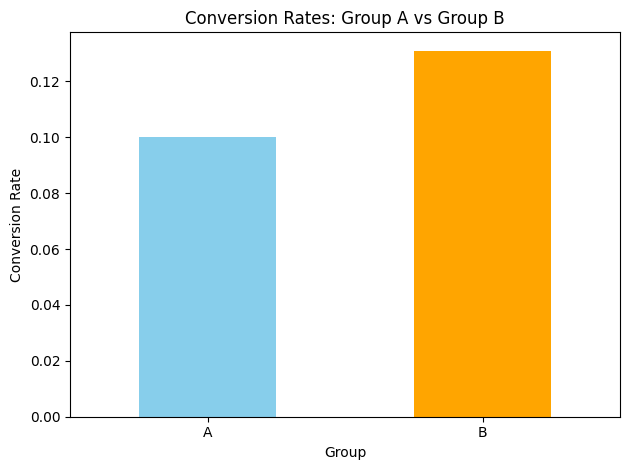

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
conversion_rates.plot(kind='bar', color=['skyblue', 'orange'], ax=ax)
ax.set_title('Conversion Rates: Group A vs Group B')
ax.set_ylabel('Conversion Rate')
ax.set_xlabel('Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
